In [44]:
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

### Download GoogleNews Pretrained Word2Vec model

https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [10]:
model = KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)

### Find The Vocabulary

In [13]:
len(model)

3000000

### Find The Vectors Of A Word

model['king']

### Dimensions

In [15]:
len(model['king'])

300

### Similarity

In [18]:
model.similarity('king', 'monarch')

0.6413194

In [19]:
model.most_similar('king')

[('kings', 0.7138046622276306),
 ('queen', 0.6510956287384033),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204219460487366),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797566771507263),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [21]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [22]:
model.similar_by_word('dog')

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609457969665527),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621778488159),
 ('pup', 0.7406911253929138)]

In [23]:
model.distance('king', 'kings')

0.28619545698165894

In [24]:
model.distance('king', 'king')

5.960464477539063e-08

In [26]:
model.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])

0.59837234

### Reduce Dimensions And Plotting

In [27]:
from sklearn.decomposition import PCA

In [70]:
king_vector = model['king']
monarch_vector = model['monarch']
queen_vector = model['queen']
sultan_vector = model['sultan']

In [71]:
king_vector

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [72]:
vectors = [king_vector, monarch_vector, queen_vector, sultan_vector]

In [73]:
pca = PCA(n_components=2)

In [74]:
vectors_transformed = pca.fit_transform(vectors)

In [76]:
vectors_transformed

array([[-0.29782271, -0.90700234],
       [-0.38836225,  1.68863061],
       [-1.5320271 , -0.56516176],
       [ 2.21821206, -0.21646652]])

In [86]:
vector_labels = ['king', 'monarch', 'queen', 'sultan']

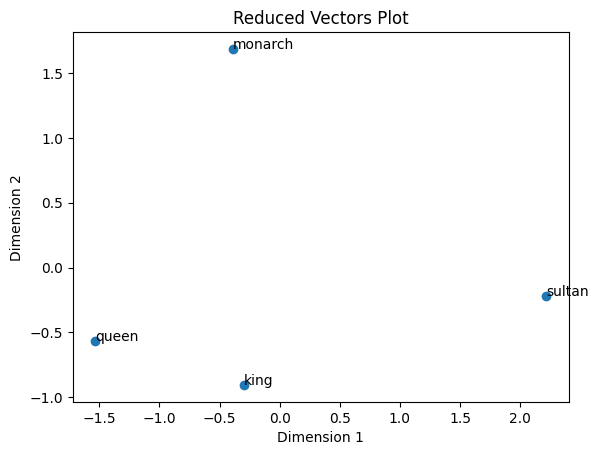

In [95]:
plt.scatter(vectors_transformed[:, 0], vectors_transformed[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Reduced Vectors Plot')
for index, value in enumerate(vectors_transformed):
    plt.text(value[0], value[1], vector_labels[index])

### Fasttext

Download from https://github.com/facebookresearch/fastText/blob/master/docs/crawl-vectors.md

In [97]:
from gensim.models import FastText

In [98]:
model_fasttext = FastText.load_fasttext_format('../data/wiki-news-300d-1M.vec')

/var/folders/x3/4l1ssbzx60n_mg4czl37_7pc0000gn/T/ipykernel_12444/4026542994.py:1: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model_fasttext = FastText.load_fasttext_format('../data/wiki-news-300d-1M.vec')


NotImplementedError: Supervised fastText models are not supported